In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from ModelFunctions import DecisionTreeFunc, KnnFunc, BayesianRidgeFunc, NeuralNetworkFunc, LinearRegFunc
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')




In [2]:
features = pd.read_csv('data/mixed_prepared_features.csv')
features = features.drop(features.columns[0], axis=1)


train = features[features['Season'] != 2018]
test = features[features['Season'] == 2018]

train_features = train.drop(columns =['score_dif']).values
train_outcome = train['score_dif'].values
test_features = test.drop(columns =['score_dif']).values
test_outcome = test['score_dif'].values


In [3]:
DPred = DecisionTreeFunc(train_features, train_outcome).predict(test_features)
KPred = KnnFunc(train_features, train_outcome).predict(test_features)
NPred = NeuralNetworkFunc(train_features, train_outcome).predict(test_features)
BPred = BayesianRidgeFunc(train_features, train_outcome).predict(test_features)
LPred = LinearRegFunc(train_features, train_outcome).predict(test_features)

In [10]:
data = {'Actual': test_outcome, 'DPred' : DPred, 'KPred': KPred, 'NPred': NPred, 'BPred': BPred, 'LPred': LPred}
preds = pd.DataFrame(data=data)

preds.to_csv('data/model_predictions.csv')

In [21]:
whole = {}

data = {'Actual': test_outcome, 'Pred' : BPred}
comp = pd.DataFrame(data=data)
whole['BayesianRidge'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

data = {'Actual': test_outcome, 'Pred' : KPred}
comp = pd.DataFrame(data=data)
whole['KNeighbors'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

data = {'Actual': test_outcome, 'Pred' : LPred}
comp = pd.DataFrame(data=data)
whole['Linear'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

data = {'Actual': test_outcome, 'Pred' : NPred}
comp = pd.DataFrame(data=data)
whole['NeuralNetwork'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

data = {'Actual': test_outcome, 'Pred' : DPred}
comp = pd.DataFrame(data=data)
whole['DecisionTree'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

accuracy = pd.DataFrame(data=whole)
accuracy.to_csv('data/model_accuracy_scores.csv')

# Copy Code Below

In [12]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

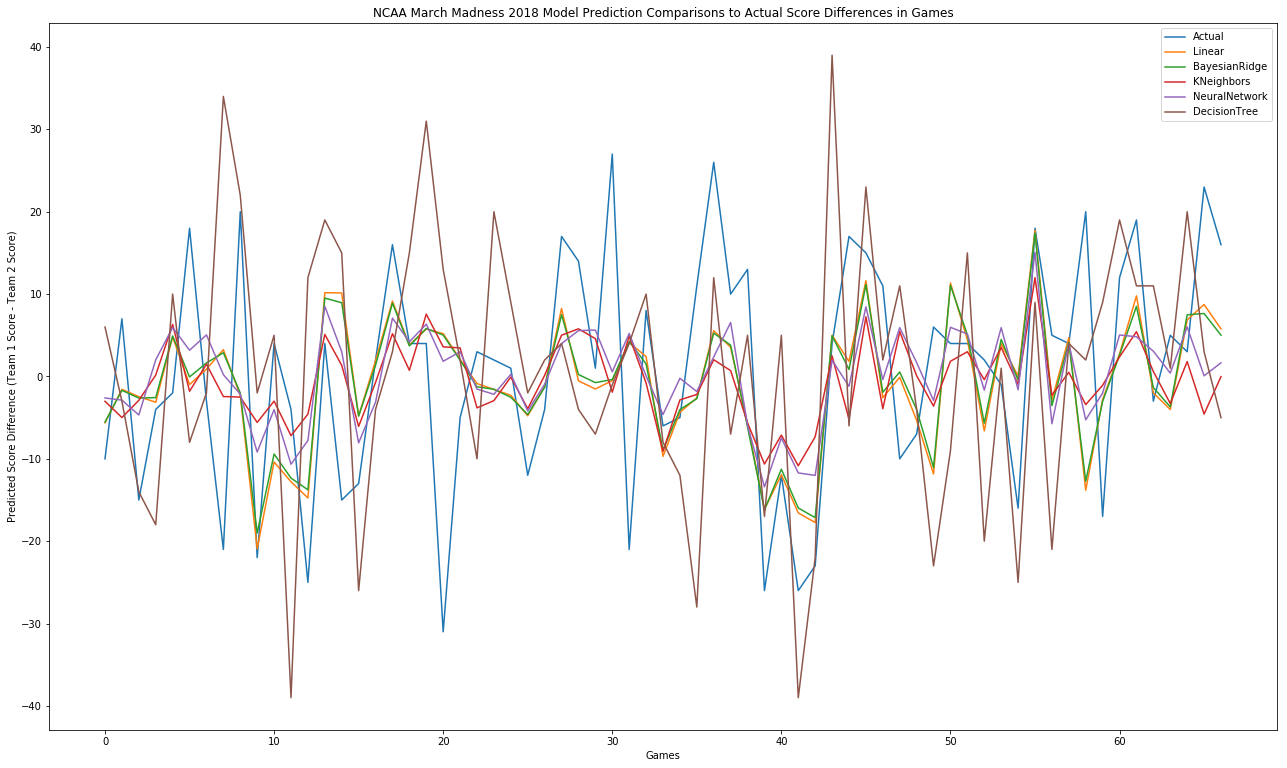

In [32]:
predDf = pd.read_csv('data/model_predictions.csv', index_col=[0])

plt.figure(figsize = [22, 13])

# plot sj
predDf['Actual'].plot(label="Actual")
predDf['LPred'].plot(label="Linear")
predDf['BPred'].plot(label="BayesianRidge")
predDf['KPred'].plot(label="KNeighbors")
predDf['NPred'].plot(label="NeuralNetwork")
predDf['DPred'].plot(label="DecisionTree")

plt.title("NCAA March Madness 2018 Model Prediction Comparisons to Actual Score Differences in Games")
plt.xlabel('Games')
plt.ylabel('Predicted Score Difference (Team 1 Score - Team 2 Score)')
plt.legend()
plt.show()


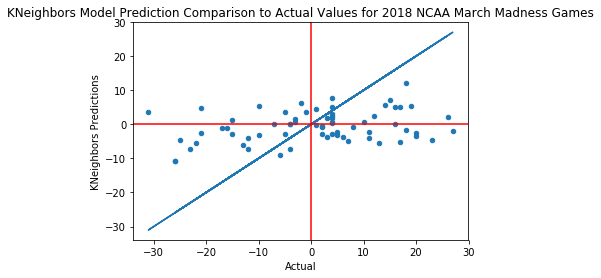

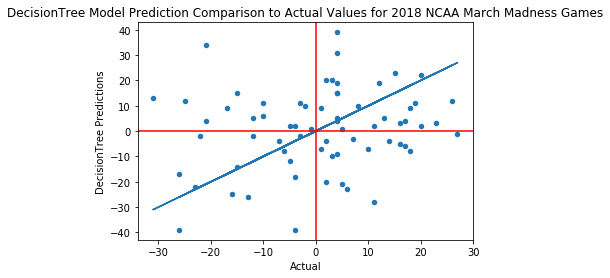

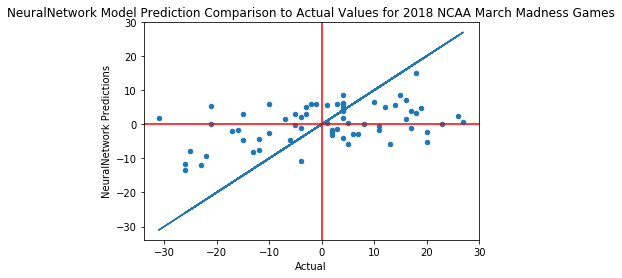

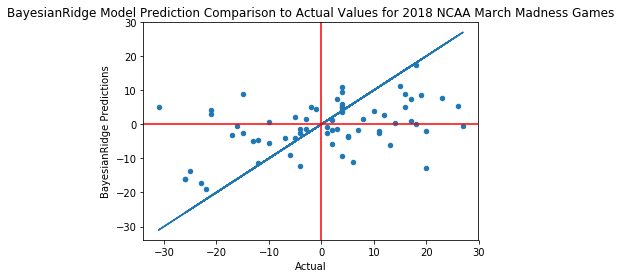

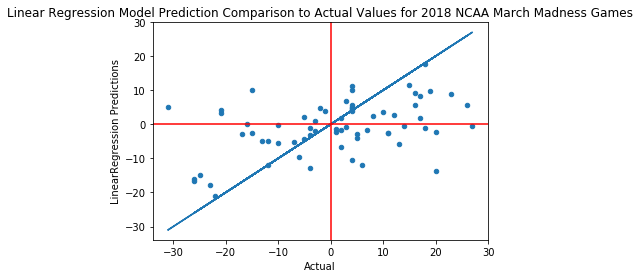

In [16]:
predDf.plot('Actual', 'KPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('KNeighbors Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('KNeighbors Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')

predDf.plot('Actual', 'DPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('DecisionTree Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('DecisionTree Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')

predDf.plot('Actual', 'NPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('NeuralNetwork Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('NeuralNetwork Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')

predDf.plot('Actual', 'BPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('BayesianRidge Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('BayesianRidge Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')

predDf.plot('Actual', 'LPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('Linear Regression Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('LinearRegression Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')


In [30]:
accuracy_score = pd.read_csv('data/model_accuracy_scores.csv', index_col=[0])


accuracy_score

,BayesianRidge,KNeighbors,Linear,NeuralNetwork,DecisionTree
0,0.61194,0.507463,0.597015,0.61194,0.567164
